In [1]:
import pandas as pd

In [2]:
# Load your CSV
df = pd.read_csv("/home/elsherif/Desktop/Thesis/ViewPython/data/Train Data/rooftop.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tile                         14059 non-null  object 
 1   total_rooftops               14059 non-null  int64  
 2   rooftops_without_solar       14059 non-null  int64  
 3   square_meters_with_solar_m2  14059 non-null  float64
 4   panel_area_m2                14059 non-null  float64
 5   district_number              14059 non-null  int64  
 6   year                         14059 non-null  int64  
 7   Unemployment_Rate            14059 non-null  object 
 8   Average_Age                  14059 non-null  object 
 9   Elderly_Population           14059 non-null  float64
 10  Young_Population             14059 non-null  float64
 11  Total_Population             14059 non-null  int64  
 12  Number_of_Houses             7796 non-null   float64
dtypes: float64(5), i

In [3]:
# List of numeric columns that may have commas
numeric_cols = ["Unemployment_Rate", "Average_Age"]

# Replace commas and convert to float
for col in numeric_cols:
    df[col] = df[col].str.replace(",", ".").astype(float)


In [4]:
df["Unemployment_Rate"] = df["Unemployment_Rate"].astype(float)
df["Average_Age"] = df["Average_Age"].astype(float)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tile                         14059 non-null  object 
 1   total_rooftops               14059 non-null  int64  
 2   rooftops_without_solar       14059 non-null  int64  
 3   square_meters_with_solar_m2  14059 non-null  float64
 4   panel_area_m2                14059 non-null  float64
 5   district_number              14059 non-null  int64  
 6   year                         14059 non-null  int64  
 7   Unemployment_Rate            14059 non-null  float64
 8   Average_Age                  14059 non-null  float64
 9   Elderly_Population           14059 non-null  float64
 10  Young_Population             14059 non-null  float64
 11  Total_Population             14059 non-null  int64  
 12  Number_of_Houses             7796 non-null   float64
dtypes: float64(7), i

In [6]:
df = df.drop(columns=[ "square_meters_with_solar_m2", "rooftops_without_solar"])

In [7]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=["panel_area_m2"]).copy()

le = LabelEncoder()
X["tile"] = le.fit_transform(X["tile"])

y = df["panel_area_m2"]


In [8]:
threshold = y.quantile(1)

In [9]:
threshold

np.float64(21447.982)

In [10]:
mask = y <= threshold
X_clean = X[mask]
y_clean = y[mask]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.1, random_state=42
)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score, root_mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import r2_score, root_mean_squared_error

# Predict
y_pred = model.predict(X_test)

# R2 score
print("R2 score:", r2_score(y_test, y_pred))

# RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)



R2 score: 0.4893226842635586
RMSE: 421.6490573193141


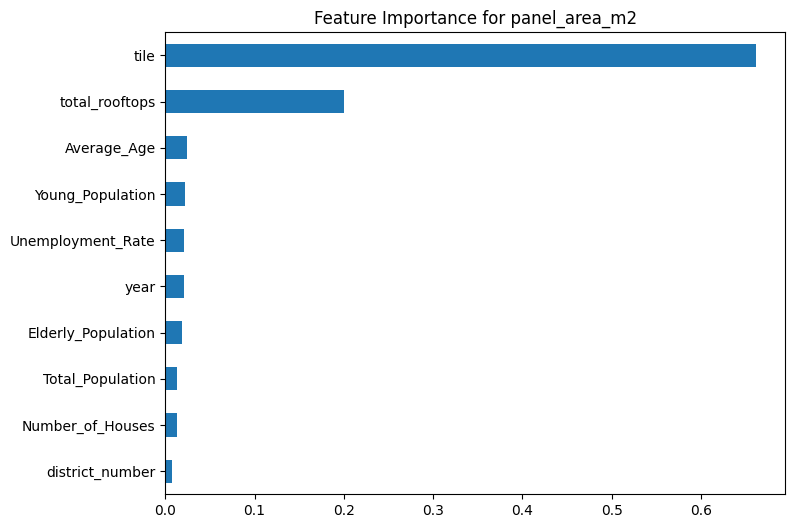

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
cols_to_drop = ["tile", "total_rooftops"]
cols_to_drop = []
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances = importances.drop(cols_to_drop, errors="ignore")
importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance for panel_area_m2")
plt.show()


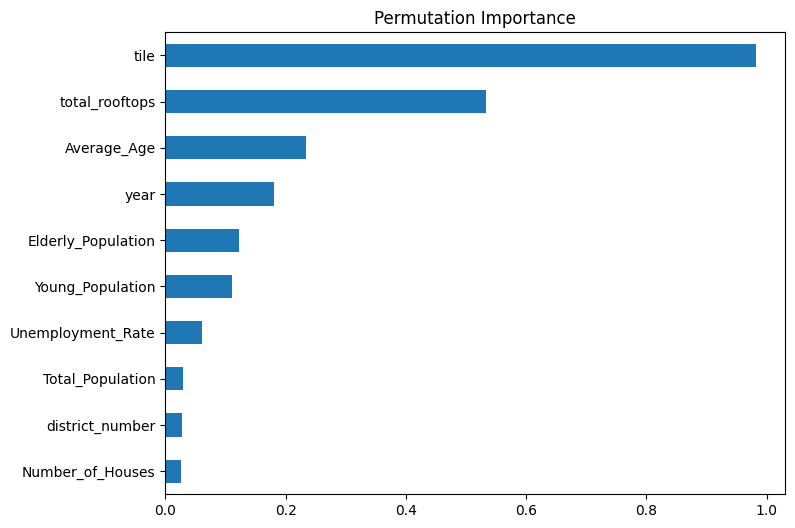

In [14]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_train, y_train, n_repeats=10)

perm_importance = pd.Series(result.importances_mean, index=X_train.columns)

perm_importance.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Permutation Importance")
plt.show()


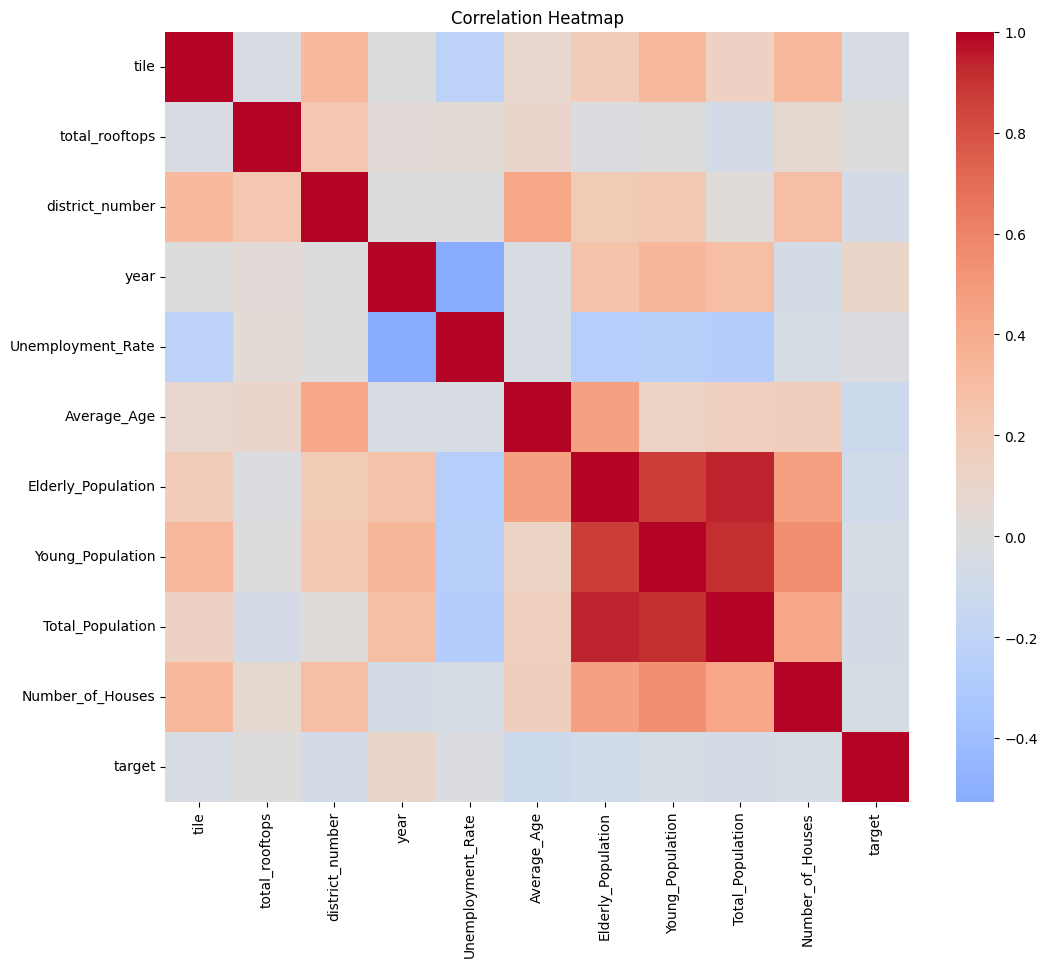

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features + target into a single DataFrame
df = X_train.copy()
df["target"] = y_train

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [100, 300, 500,700],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)


In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2: 0.5041407104254281
RMSE: 415.4866529986788


In [ ]:
# The grid object already has the best model trained
# best_model = grid.best_estimator_
best_model = RandomForestRegressor(
    max_depth=20, 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=300,
    random_state=42  # Added for reproducibility
)
# Predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, root_mean_squared_error

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))


R2: 0.5041407104254281
RMSE: 415.4866529986788


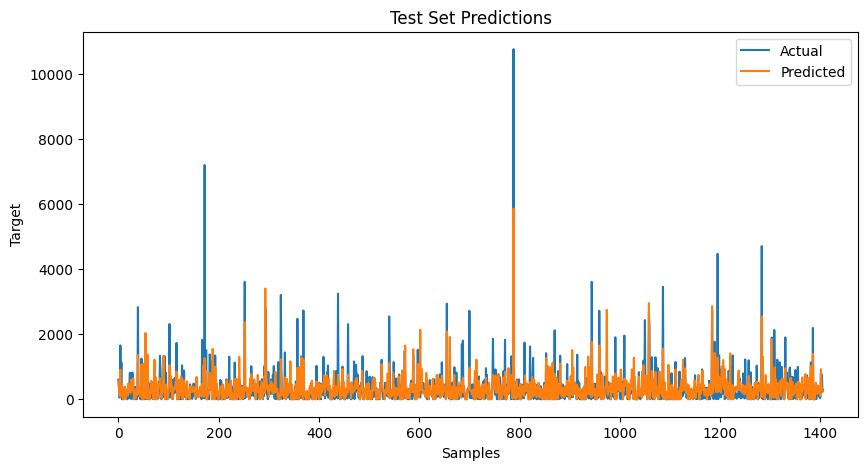

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("Target")
plt.title("Test Set Predictions")
plt.legend()
plt.show()


In [ ]:
df = df.sort_values(["district_number", "year"])
le = LabelEncoder()
df["tile"] = le.fit_transform(df["tile"])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2026-01-08 00:03:42.810223: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


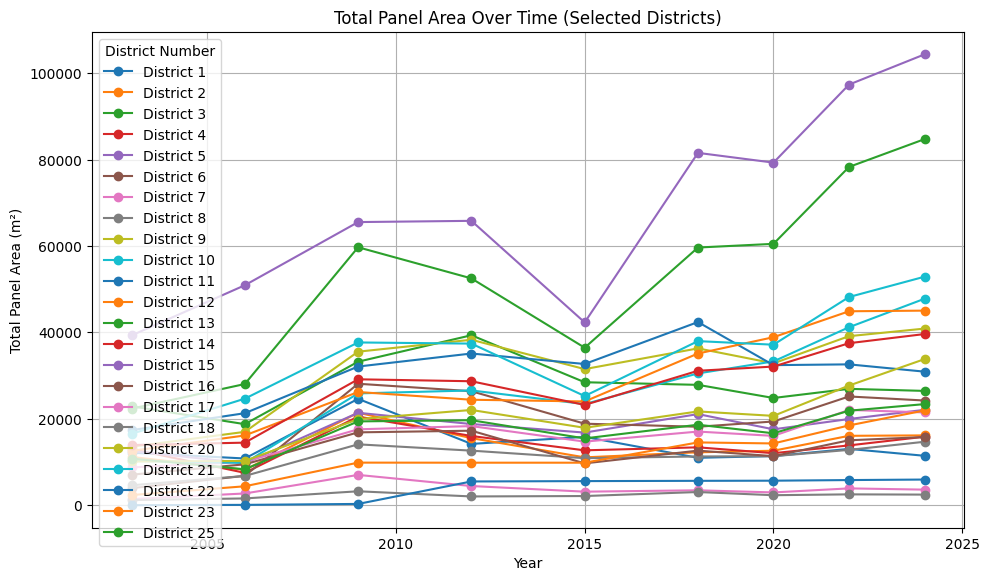

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Sort the DataFrame ----
df = df.sort_values(["district_number", "year"])

# ---- Select specific districts ----
selected_districts = [21,22,23,24,25,26,27]   # <-- change this list as needed

# ---- Filter the DataFrame ----
df_filtered = df[df["district_number"].isin(selected_districts)]

# ---- Group by district and year, then sum panel_area_m2 ----
df_grouped = (
    df
    .groupby(["district_number", "year"])["panel_area_m2"]
    .sum()
    .reset_index()
)

# ---- Plot the summed panel area over time ----
plt.figure(figsize=(10,6))

for district, group in df_grouped.groupby("district_number"):
    plt.plot(
        group["year"],
        group["panel_area_m2"],
        marker="o",
        label=f"District {district}"
    )

plt.xlabel("Year")
plt.ylabel("Total Panel Area (m²)")
plt.title("Total Panel Area Over Time (Selected Districts)")
plt.legend(title="District Number")
plt.grid(True)
plt.tight_layout()
plt.show()


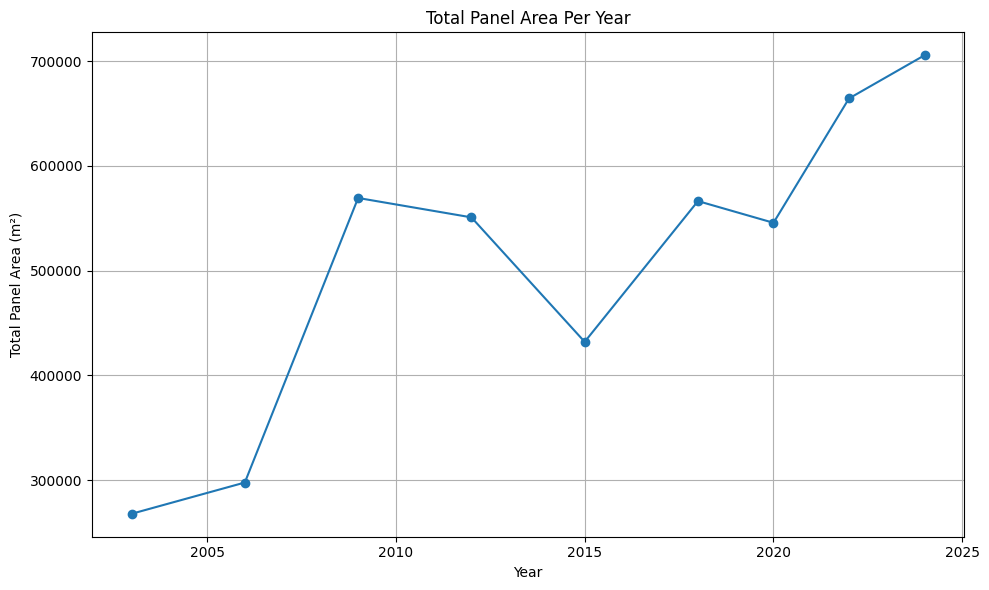

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Sort by year (optional but cleaner) ----
df = df.sort_values("year")

# ---- Group by year and sum panel area ----
df_yearly = (
    df.groupby("year")["panel_area_m2"]
      .sum()
      .reset_index()
)

# ---- Plot ----
plt.figure(figsize=(10,6))
plt.plot(
    df_yearly["year"],
    df_yearly["panel_area_m2"],
    marker="o"
)

plt.xlabel("Year")
plt.ylabel("Total Panel Area (m²)")
plt.title("Total Panel Area Per Year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
years = df["year"].unique()
num_years = len(years)

tile_counts = df.groupby("tile")["year"].nunique()
valid_tiles = tile_counts[tile_counts == num_years].index
df_tiles = df[df["tile"].isin(valid_tiles)].copy()


In [ ]:
features = [
    "total_rooftops", "Unemployment_Rate", "Average_Age",
    "Elderly_Population", "Young_Population", "Total_Population",
    "district_number"
]
target_col = "panel_area_m2"

In [ ]:
def create_tile_sequences(df, window=5):
    X_seq, y_seq = [], []
    
    for tile, group in df.groupby("tile"):
        g = group.sort_values("year")
        X_vals = g[features].values
        y_vals = g[target_col].values
        
        for i in range(len(g) - window):
            X_seq.append(X_vals[i:i+window])
            y_seq.append(y_vals[i+window])
    
    return np.array(X_seq), np.array(y_seq)

X_tiles, y_tiles = create_tile_sequences(df_tiles)
print("Tile-based sequences shape:", X_tiles.shape, y_tiles.shape)


Tile-based sequences shape: (6124, 5, 7) (6124,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

n_samples, timesteps, n_features = X_tiles.shape

for i in range(n_features):
    scaler = MinMaxScaler()
    # flatten to 2D: (samples*timesteps, 1)
    flat = X_tiles[:,:,i].reshape(-1,1)
    scaled_flat = scaler.fit_transform(flat)
    # reshape back to original 2D shape (samples, timesteps)
    X_tiles[:,:,i] = scaled_flat.reshape(n_samples, timesteps)


In [ ]:
y_min, y_max = y_tiles.min(), y_tiles.max()
y_tiles_scaled = (y_tiles - y_min) / (y_max - y_min)


In [ ]:
split_idx = int(0.8 * len(X_tiles))
X_train, X_test = X_tiles[:split_idx], X_tiles[split_idx:]
y_train, y_test = y_tiles_scaled[:split_idx], y_tiles_scaled[split_idx:]


In [ ]:
timesteps = X_train.shape[1]
n_features = X_train.shape[2]

tile_model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(timesteps, n_features)),
    Dense(32, activation="relu"),
    Dense(1)
])

tile_model.compile(optimizer=Adam(learning_rate=0.0005), loss="mse")
tile_model.summary()


2025-11-27 13:42:48.477630: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/elsherif/Desktop/Thesis/ViewPython/.venvGeometry/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,545 (80.25 KB)

 Trainable params: 20,545 (80.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = tile_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2
)

Epoch 1/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0011 - val_loss: 8.9262e-04
Epoch 2/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011 - val_loss: 5.8632e-04
Epoch 3/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0011 - val_loss: 7.6387e-04
Epoch 4/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0010 - val_loss: 5.9194e-04
Epoch 5/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0010 - val_loss: 7.2127e-04
Epoch 6/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0010 - val_loss: 6.0162e-04
Epoch 7/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0010 - val_loss: 6.0597e-04
Epoch 8/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0010 - val_loss: 8.3865e-04
Epoch 9/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0010 - val_loss: 7.0718e-04
Epoch 10/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.9299e-04 - val_loss: 6.1254e-04
Epoch 11/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0010 - val_loss: 5.8780e-04
Epo

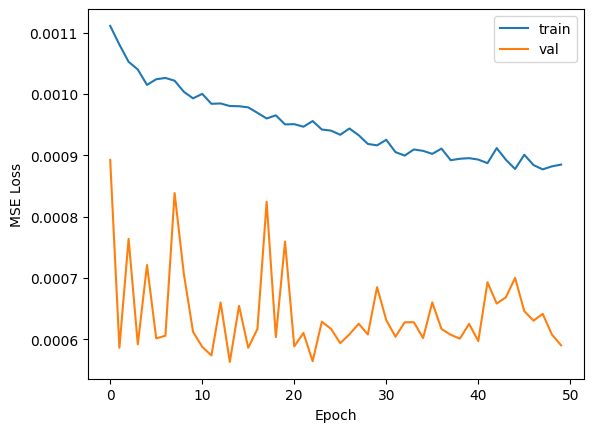

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


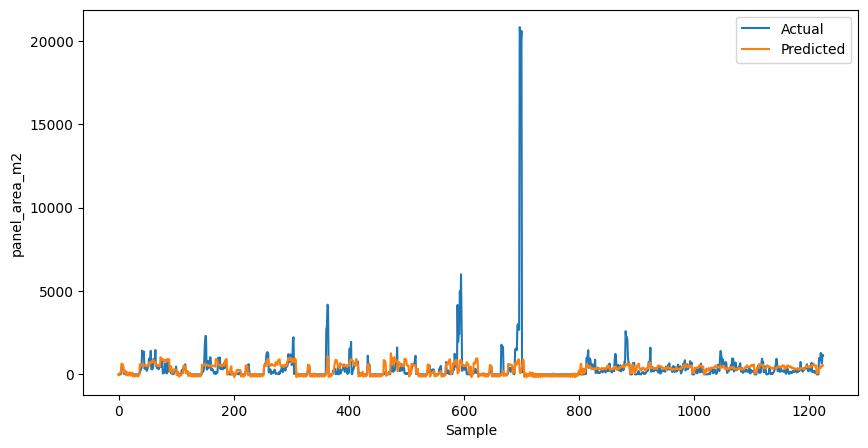

In [ ]:
y_pred_scaled = tile_model.predict(X_test)
y_pred = y_pred_scaled * (y_max - y_min) + y_min  # rescale back to original

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test * (y_max - y_min) + y_min, label='Actual')  # rescale y_test
plt.plot(y_pred, label='Predicted')
plt.xlabel("Sample")
plt.ylabel(target_col)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Rescale y_test back to original
y_test_orig = y_test * (y_max - y_min) + y_min

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
print("Test RMSE:", rmse)

# MAE
mae = mean_absolute_error(y_test_orig, y_pred)
print("Test MAE:", mae)

# R^2 Score
r2 = r2_score(y_test_orig, y_pred)
print("Test R^2:", r2)


Test RMSE: 1246.353049639673
Test MAE: 322.61647979620335
Test R^2: 0.017405687778484724


In [ ]:
panel_area = df['panel_area_m2']

largest = panel_area.max()
smallest = panel_area.min()
median = panel_area.median()
average = panel_area.mean()

print("Largest panel area:", largest)
print("Smallest panel area:", smallest)
print("Median panel area:", median)
print("Average panel area:", average)


Largest panel area: 21447.982
Smallest panel area: 0.0
Median panel area: 163.166
Average panel area: 327.15555217298527
